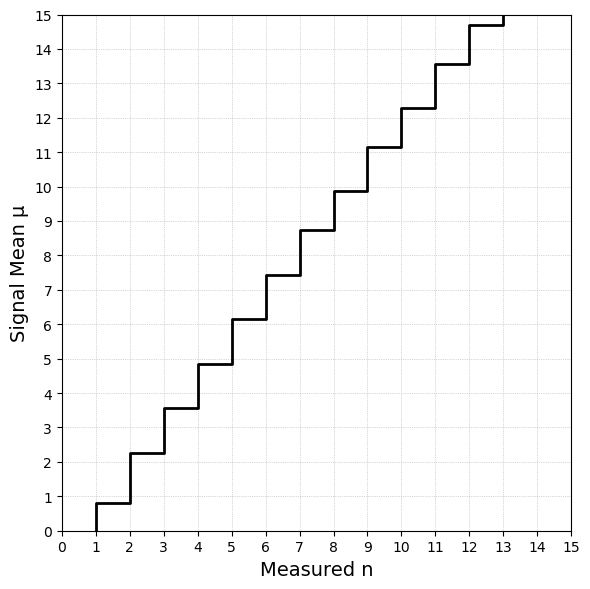

In [16]:
import numpy as np
import matplotlib.pyplot as plt

b = 3
target = 0.1
Nmc = 200000

mu_values = np.linspace(0, 16,100)
nu_values = []

for mu in mu_values:
    lam = mu + b
    n_samples = np.random.poisson(lam, Nmc)
    n_max = n_samples.max()
    unique_n = np.arange(0, n_max + 1)
    counts = np.array([(n_samples == n).sum() for n in unique_n])
    pmf_est = counts / counts.sum()
    cumulative = np.cumsum(pmf_est)
    nu = np.where(cumulative >= target)[0][0]
    nu_values.append(nu)

mu_values = np.array(mu_values)
nu_values = np.array(nu_values)

plt.figure(figsize=(6,6))
plt.step(nu_values, mu_values, where='post', linewidth=2, color='black')
plt.xlabel("Measured n", fontsize=14)
plt.ylabel("Signal Mean μ", fontsize=14)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 16, 1))
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


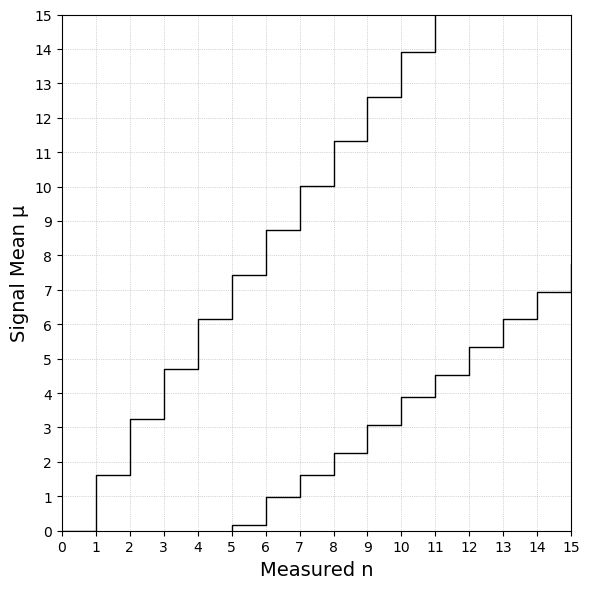

In [21]:
import numpy as np
import matplotlib.pyplot as plt

b = 3
target_low = 0.05
target_high = 0.95
Nmc = 200000

mu_values = np.linspace(0, 16,100)
nu_values_min = []
nu_values_max = []

for mu in mu_values:
    lam = mu + b
    n_samples = np.random.poisson(lam, Nmc)
    n_max = n_samples.max()
    unique_n = np.arange(0, n_max + 1)
    counts = np.array([(n_samples == n).sum() for n in unique_n])
    pmf_est = counts / counts.sum()
    cumulative = np.cumsum(pmf_est)
    nu_min = np.where(cumulative >= target_low)[0][0]
    idx = np.where(cumulative >= target_high)[0][0]
    nu_max = idx - 1
    if nu_max < 0:
        nu_max = 0
    nu_values_min.append(nu_min)
    nu_values_max.append(nu_max)



mu_values = np.array(mu_values)
nu_values_min = np.array(nu_values_min)
nu_values_max = np.array(nu_values_max)

plt.figure(figsize=(6,6))
plt.step(nu_values_min, mu_values, where='post', linewidth=1, color='black')
plt.step(nu_values_max, mu_values, where='post', linewidth=1, color='black')
plt.xlabel("Measured n", fontsize=14)
plt.ylabel("Signal Mean μ", fontsize=14)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 16, 1))
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()
